# Import Libraries

In [1]:
# import libraries
import os,sys

# Get 
current_dir=os.getcwd()
print(current_dir)

#Get the parent directory
parent_dir=os.path.dirname(current_dir)
print(parent_dir)

#Insert the path to the parent directory
sys.path.insert(0,parent_dir)



c:\Users\pc\Desktop\week 4\project_week_4\notebooks
c:\Users\pc\Desktop\week 4\project_week_4


In [2]:
#import libraries
import pandas as pd
import numpy as np

# import functions/class
from scripts.load_data import read_csv_file
from scripts.EDA import check_promotion_distribution,analyze_holiday_sales,analyze_seasonal_purchases,analyze_promo_effects
from scripts.EDA import analyze_sales_customer_correlation,analyze_promo_effectiveness,analyze_weekday_open_stores
from scripts.EDA import analyze_customer_behavior_by_time
from scripts.preprocessing import impute_categorical_missing_with_placeholder,impute_categorical_missingValue_with_mode
from scripts.preprocessing import detect_and_visualize_outliers

# Upload Data

In [3]:
# Load the dataset
os.chdir('../scripts')
train_path='../data/train.csv'
train_data=read_csv_file(train_path)
train_data.head(5)

2025-03-07 22:53:23,807 - INFO - Loading data from file.......
c:\Users\pc\Desktop\week 4\project_week_4\scripts\load_data.py:14: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
2025-03-07 22:53:26,935 - INFO - Data Loaded with shape (1017209, 9)


Dataset loaded successfully from ../data/train.csv


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# Load the dataset
os.chdir('../scripts')
test_path='../data/test.csv'
test_data=read_csv_file(test_path)
test_data.head(5)

2025-03-07 22:53:28,777 - INFO - Loading data from file.......
2025-03-07 22:53:29,025 - INFO - Data Loaded with shape (41088, 8)


Dataset loaded successfully from ../data/test.csv


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [5]:
 # Merge train and test data
data = pd.concat([train_data, test_data], ignore_index=True)
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN


# Preprocessing

In [11]:
data.shape

(1058297, 10)

In [12]:
data.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales              41088
Customers          41088
Open                  11
Promo                  0
StateHoliday           0
SchoolHoliday          0
Id               1017209
dtype: int64

In [27]:
columns1=['Sales','Open']
impute_categorical_missingValue_with_mode(data, columns1)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1058292,1111,6,2015-08-01,0.0,NaN,1.0,0,0,0,41084.0
1058293,1112,6,2015-08-01,0.0,NaN,1.0,0,0,0,41085.0
1058294,1113,6,2015-08-01,0.0,NaN,1.0,0,0,0,41086.0
1058295,1114,6,2015-08-01,0.0,NaN,1.0,0,0,0,41087.0


In [28]:
columns=['Customers']
impute_categorical_missing_with_placeholder(data, columns,placeholder='Unknown')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-31,5263.0,555.0,1.0,1,0,1,NaN
1,2,5,2015-07-31,6064.0,625.0,1.0,1,0,1,NaN
2,3,5,2015-07-31,8314.0,821.0,1.0,1,0,1,NaN
3,4,5,2015-07-31,13995.0,1498.0,1.0,1,0,1,NaN
4,5,5,2015-07-31,4822.0,559.0,1.0,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...
1058292,1111,6,2015-08-01,NaN,Unknown,1.0,0,0,0,41084.0
1058293,1112,6,2015-08-01,NaN,Unknown,1.0,0,0,0,41085.0
1058294,1113,6,2015-08-01,NaN,Unknown,1.0,0,0,0,41086.0
1058295,1114,6,2015-08-01,NaN,Unknown,1.0,0,0,0,41087.0


In [30]:
data.duplicated().sum()

np.int64(0)

Outliers (IQR, threshold=1.5):
         Store  DayOfWeek        Date    Sales  Customers  Open  Promo  \
6            7          5  2015-07-31  15344.0     1414.0   1.0      1   
23          24          5  2015-07-31  14190.0     1082.0   1.0      1   
24          25          5  2015-07-31  14180.0     1586.0   1.0      1   
83          84          5  2015-07-31  14949.0     1439.0   1.0      1   
107        108          5  2015-07-31  14927.0      992.0   1.0      1   
...        ...        ...         ...      ...        ...   ...    ...   
1015767    788          3  2013-01-02  17934.0     1791.0   1.0      0   
1015796    817          3  2013-01-02  25357.0     3462.0   1.0      0   
1015821    842          3  2013-01-02  20355.0     1257.0   1.0      0   
1016093   1114          3  2013-01-02  20642.0     3401.0   1.0      0   
1016356    262          2  2013-01-01  17267.0     2875.0   1.0      0   

        StateHoliday  SchoolHoliday  Id  
6                  0              1 Na

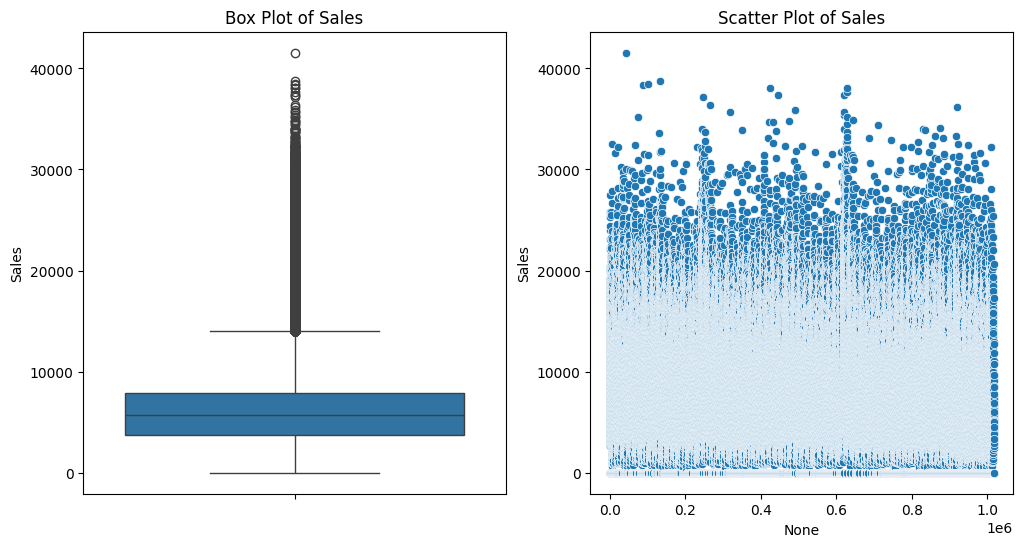

In [6]:
detect_and_visualize_outliers(data, 'Sales', iqr_threshold=1.5, zscore_threshold=3)

# Anlaysis

Training Set Promotion Distribution:
Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64

Test Set Promotion Distribution:
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


2025-03-07 20:29:46,593 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:29:47,193 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:29:47,459 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:29:47,482 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


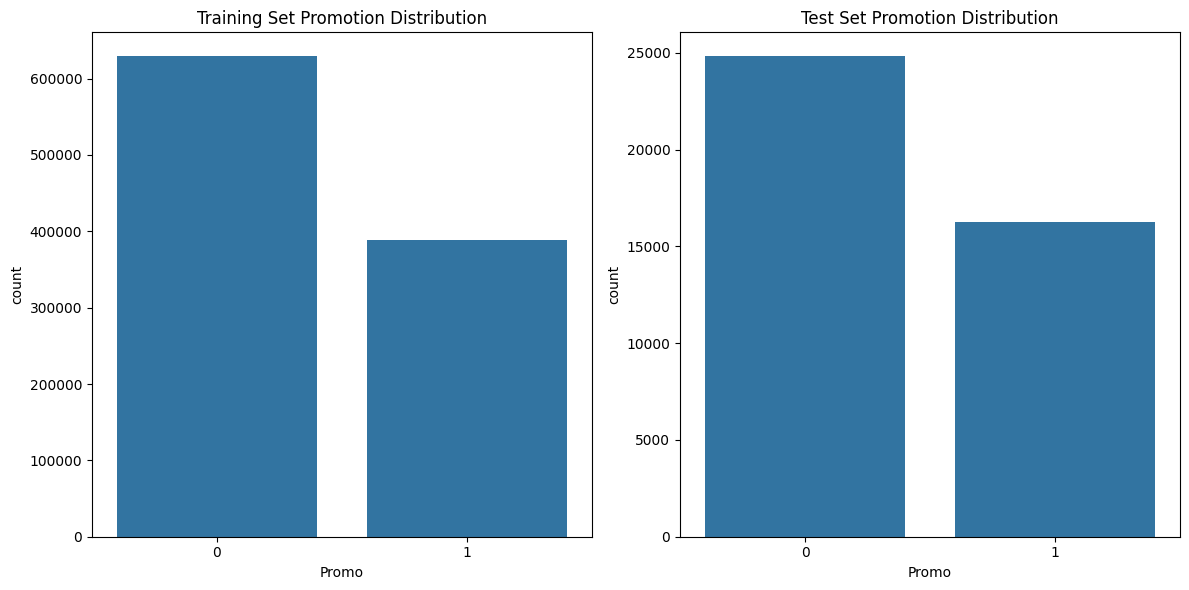

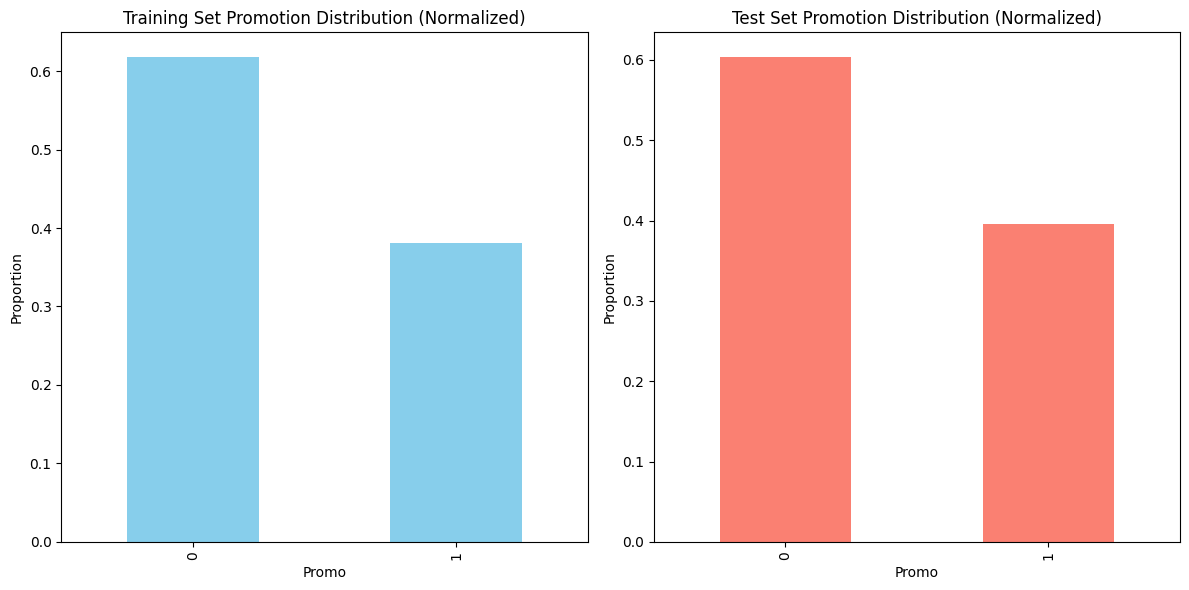

In [32]:
check_promotion_distribution(train_data, test_data, promotion_column='Promo')

c:\Users\pc\Desktop\week 4\project_week_4\scripts\EDA.py:284: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=[date_column])


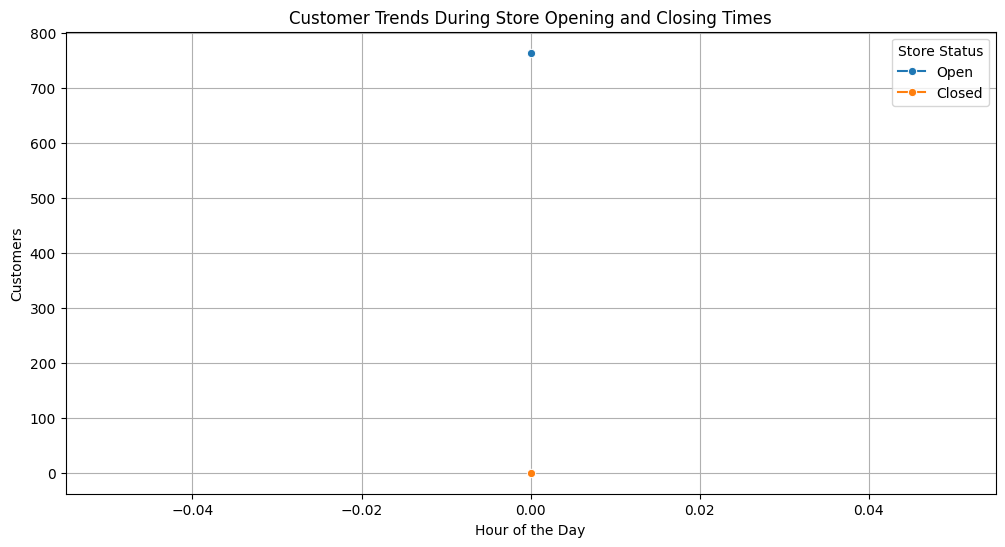

In [10]:

analyze_store_trends(train_path)

In [33]:
analyze_holiday_sales(data)

In [34]:
seasonal_periods = {
    'Christmas': ('2015-12-20', '2015-12-31'),
    'Easter': ('2015-04-03', '2015-04-06'),  
    'Summer': ('2015-06-01', '2015-08-31')
}

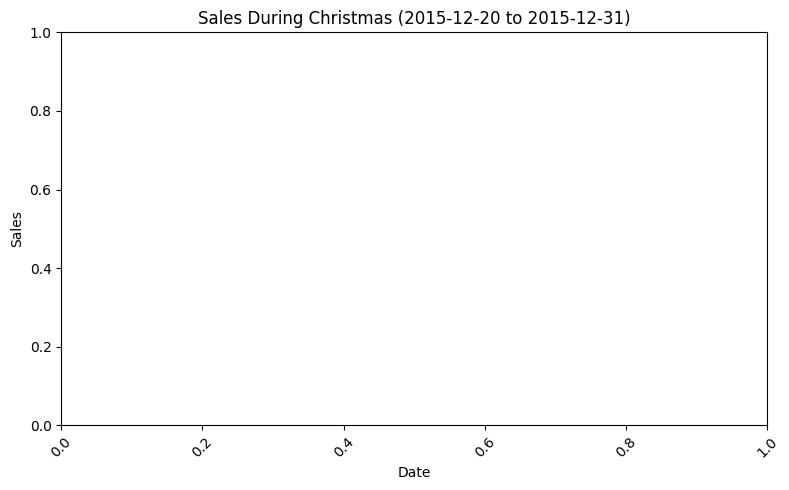


Average Sales During Christmas: nan
------------------------------


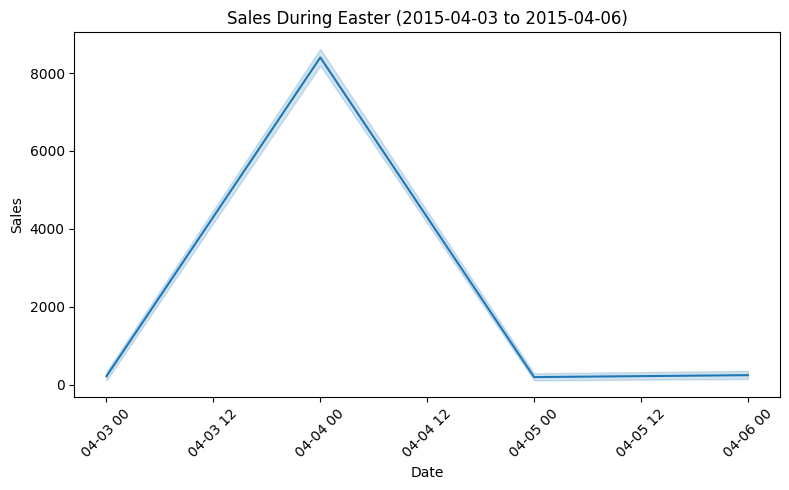


Average Sales During Easter: 2264.39
------------------------------


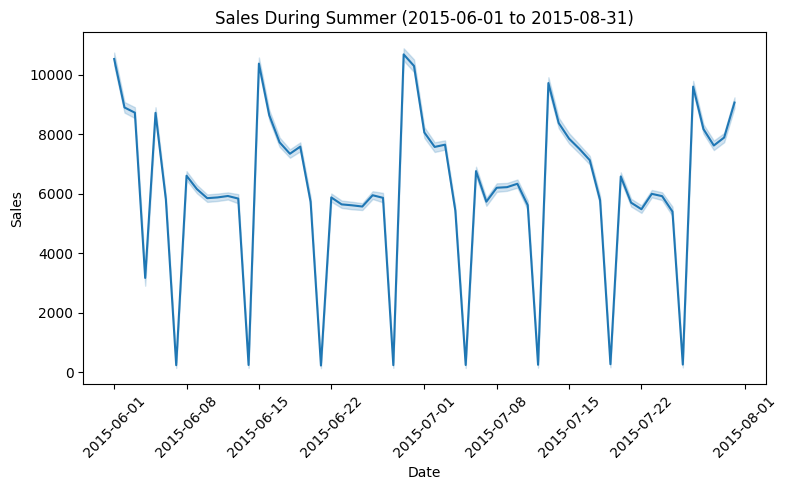


Average Sales During Summer: 6170.49
------------------------------


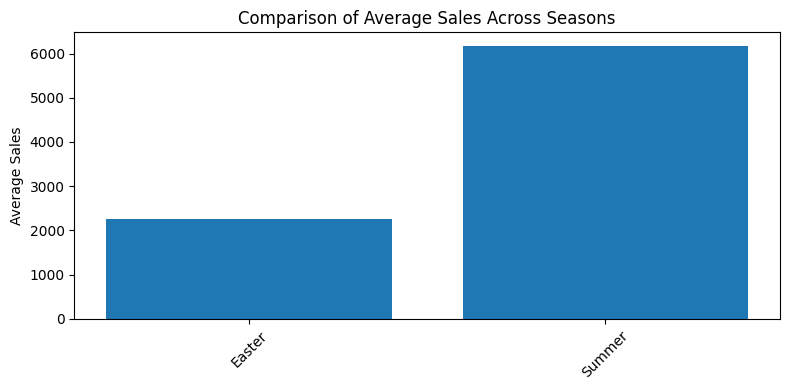

In [35]:

analyze_seasonal_purchases(data, seasonal_periods=seasonal_periods)

Correlation between Sales and Customers: 0.89


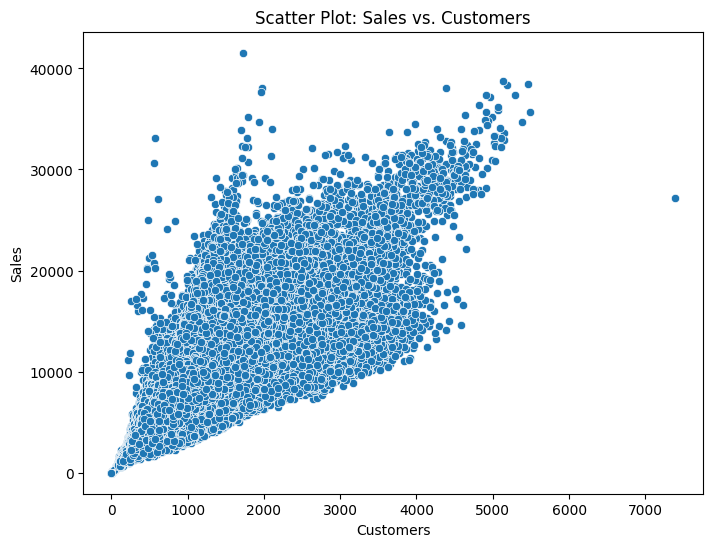

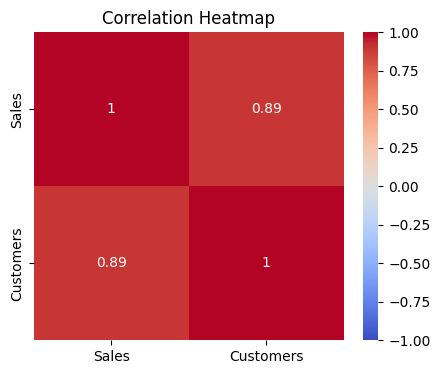

In [36]:
analyze_sales_customer_correlation(data)


Overall Promo Effect:
             Sales   Customers
Promo                         
0      4406.050805  517.823542
1      7991.152046  820.098815


2025-03-07 20:34:52,011 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:34:52,786 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:35:12,941 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:35:13,635 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


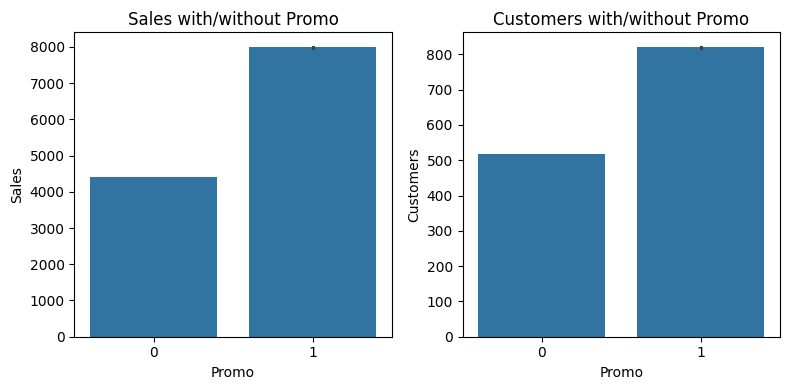

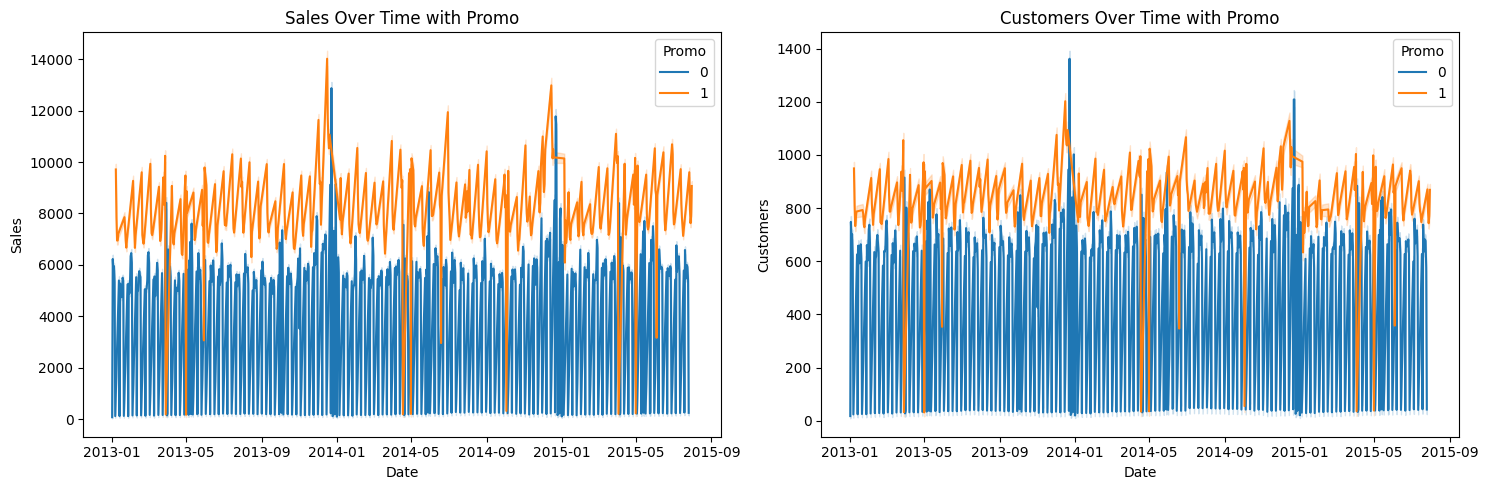

In [7]:
analyze_promo_effects(data)

2025-03-07 20:39:52,571 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:39:52,590 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:39:57,014 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-07 20:39:57,022 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


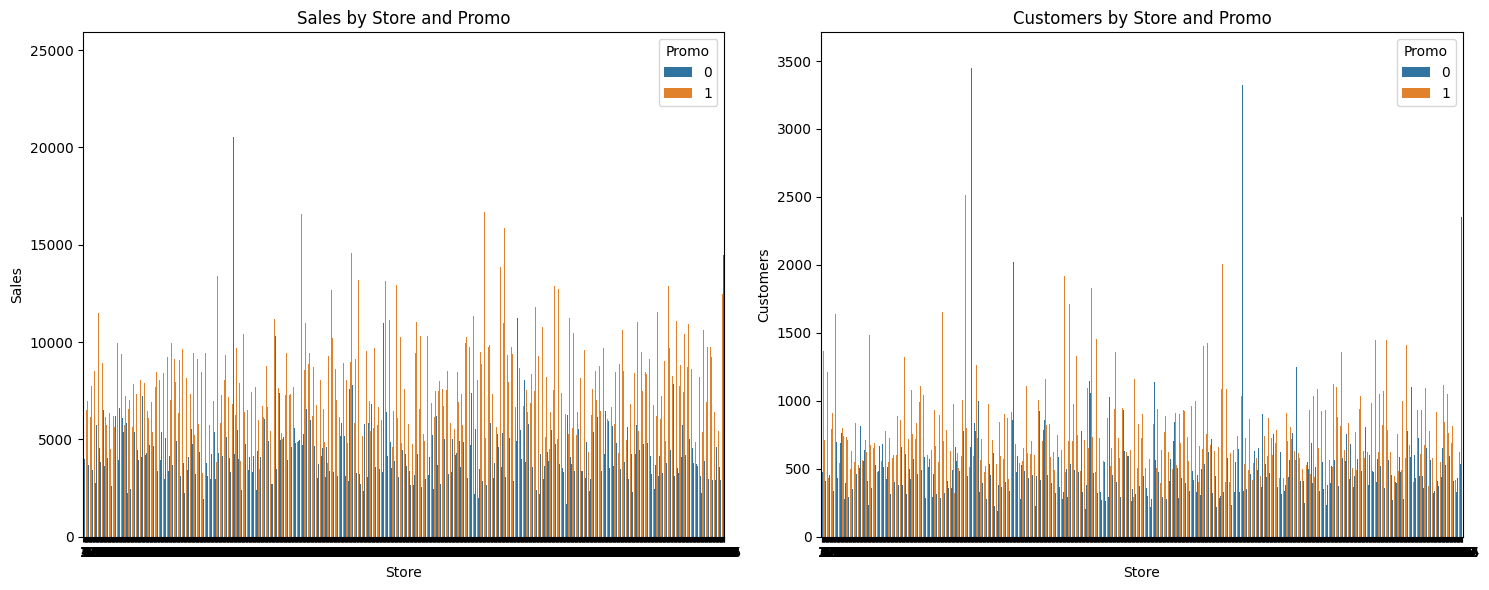


Stores with Lowest Promo Impact (Based on Sales):
Promo            0            1  Sales_Increase
Store                                          
274    4124.945017  3870.261111     -254.683906
948    6759.482818  6953.597222      194.114404
353    5483.197595  5734.866667      251.669072

Stores with Highest Potential (Based on Average Sales):
              Sales    Customers
Store                           
262    20718.515924  3402.010616
817    18108.139066  2605.488323
562    17969.556263  3105.053079


In [9]:
analyze_promo_effectiveness(data)

In [10]:
weekday_values = [1, 2, 3, 4, 5]  # Monday to Friday
weekend_values = [6, 7]  # Saturday and Sunday

analyze_weekday_open_stores(data, weekday_values=weekday_values, weekend_values=weekend_values)


Stores Open on All Weekdays:
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 21

In [ ]:
analyze_competitor_distance_sales(data, city_center_column='InCityCenter')

In [ ]:
analyze_competitor_impact(data)